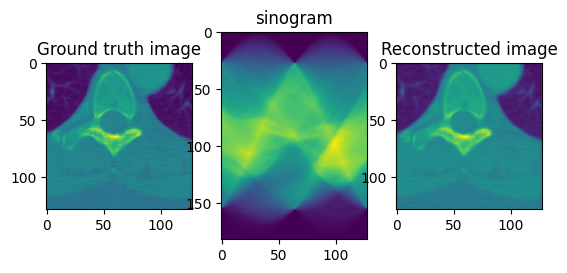

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.transform import radon,iradon,resize
from skimage.util import random_noise
from pydicom.data import get_testdata_file
import pydicom
import plotly.graph_objects as go

# settings
n = 128
theta = np.linspace(0., 180.,n, endpoint=False)
sigma = 1e-1


# ground truth image
filename = get_testdata_file("CT_small.dcm")
dsct = pydicom.dcmread(filename)
a = 25
i0 = 64
j0 = 64
# for i in range(dsct.pixel_array.shape[0]):
#     for j in range(dsct.pixel_array.shape[1]):
#         if (i-i0)**2 + (j-j0)**2 <= a**2:
#             dsct.pixel_array[i,j] = 4000
image = dsct.pixel_array#resize(data.shepp_logan_phantom(),(n,n))

# transform and add noise
sinogram = radon(image, theta=theta, circle = False)
sinogram_noisy = random_noise(sinogram,mode='gaussian',var=sigma,clip=False)

# reconstruction, type help(iradon) for more options regarding the filter
image_reconstructed = iradon(sinogram, theta=theta, circle = False)

# plot
fig, ax = plt.subplots(1,3)

ax[0].imshow(image)
ax[0].set_title('Ground truth image')

ax[1].imshow(sinogram)
ax[1].set_title('sinogram')

ax[2].imshow(image_reconstructed)
ax[2].set_title('Reconstructed image')

plt.show()

In [29]:
sinogram.shape

NameError: name 'sinogram' is not defined

In [13]:
N_xy = dsct.pixel_array.shape[0]
mu_3d = go.Surface(z=sinogram, x=np.asarray(range(N_xy)), y=np.asarray(range(N_xy)))
fig = go.Figure(data = [mu_3d])
fig.show()